In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import pickle

In [4]:
dataset = pd.read_csv('diabetes.csv')
#https://www.kaggle.com/uciml/pima-indians-diabetes-database
#https://rpubs.com/ikodesh/53189#:~:text=According%20to%20http%3A%2F%2Fwww,family%20history%20to%20predict%20how
#Dataset de mulheres com pelo menos 21 anos

##ANÁLISE DO CONJUNTO

In [5]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Diabetes = produção insuficiente ou má absorção de insulina, hormônio que regula o nível de glicose no sangue**

**Gravidez**

Durante a gravidez o corpo passa a produzir uma maior quantidade de **glicose** ocorrendo o mesmo com a insulina

**Glicose**

Teste oral de intolerância à glicose (TOTG) - Interpretação após 2 horas
* Normal: inferior a 140 mg/dl;
* Resistência à insulina: entre 140 e 199 mg/dl;
* Diabetes: igual ou superior a 200 mg/dl.

**Aumento da pressão**

Resistência a insulina resulta em sangue com níveis maiores de açúcar, contribuindo para o enrijecimento das artérias e aumento da pressão.

**Pele mais fina e elástica**

**Insulina**

Após a alimentação com carboidrato o nível de insulina sobe 

**BMI = IMC**
* Peso normal: 18,5 - 24,9
* Sobrepeso: 25 - 29,9
* Obesidade: >= 30

**DiabetesPedigreeFunction**

Função que prevê, com base no histórico familiar, como o diabetes afetará a pessoa

**Idade**

Maior incidência de diabetes a partir dos 40 anos

**Visão geral do dataset**

In [7]:
dataset.shape

(768, 9)

**Registros: 768 ---- Atributos: 8**

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**Atributos: numéricos ---- Atributos faltantes: 0**

In [9]:
np.unique(dataset.iloc[:,-1:])

array([0, 1])

**Classes: 2 ---- 1 = diabético ---- 2 = não diabético**

In [10]:
(dataset == 0).sum(axis=0)

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

**Valores iguais a 0 por coluna**

In [11]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Informações estatísticas dos dados**

# VISUALIZAÇÃO DOS DADOS

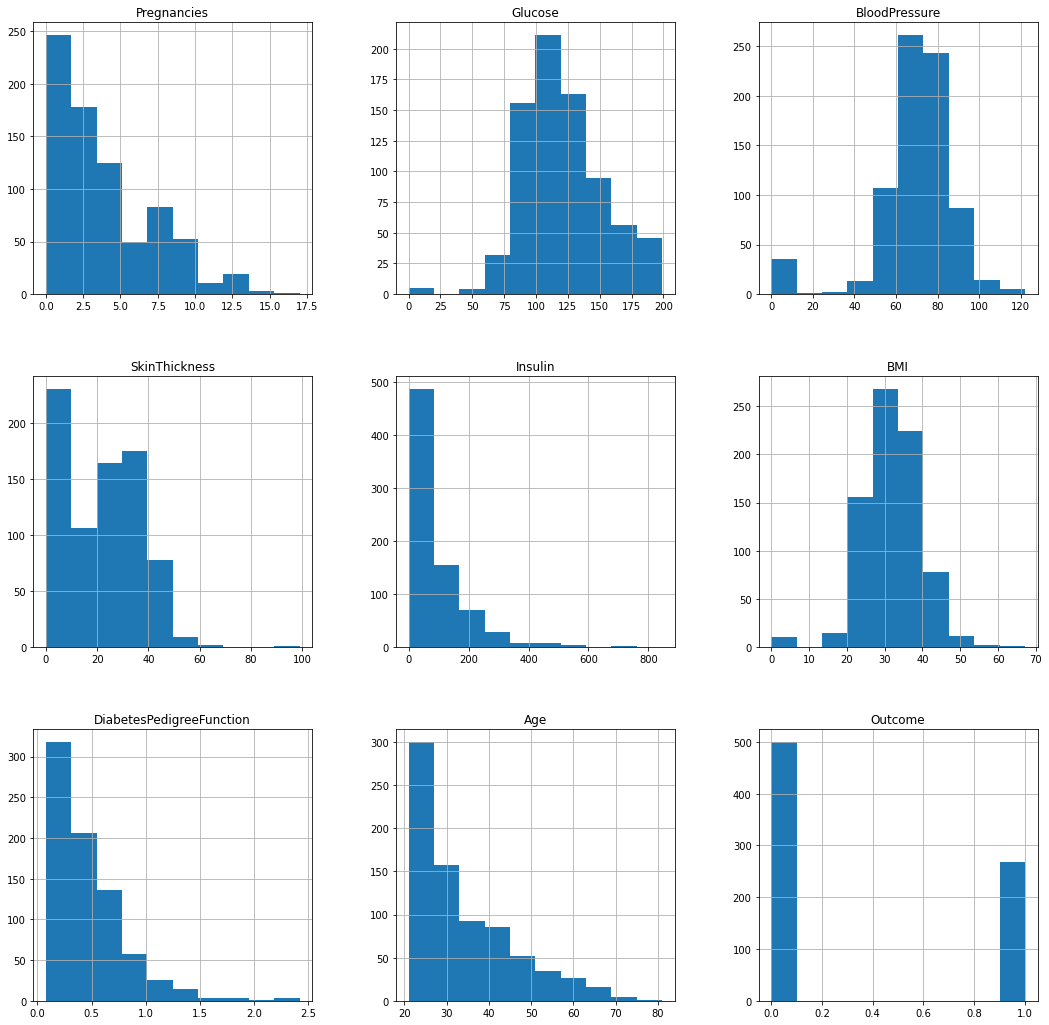

In [12]:
_ = dataset.hist(figsize = (18,18))

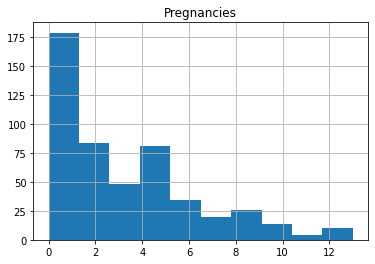

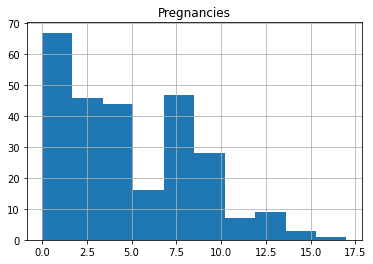

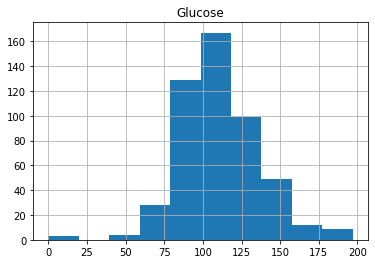

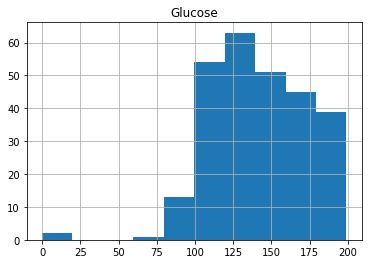

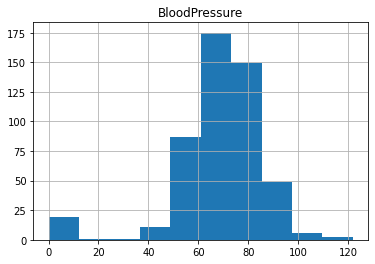

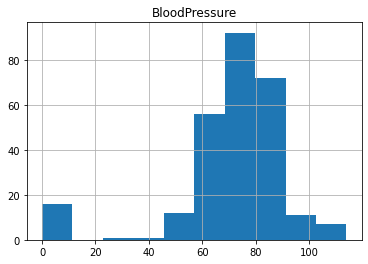

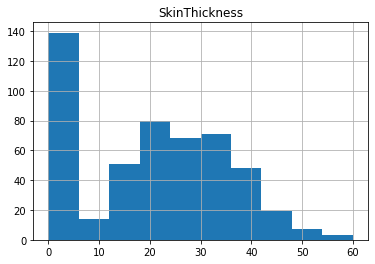

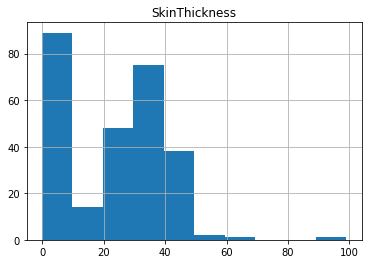

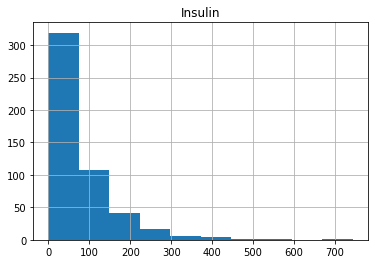

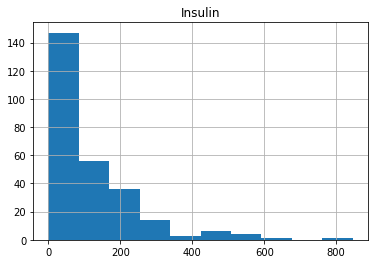

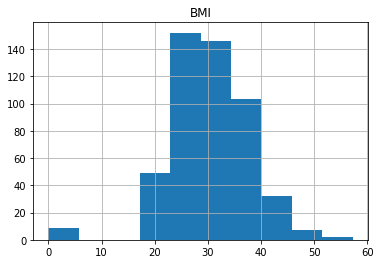

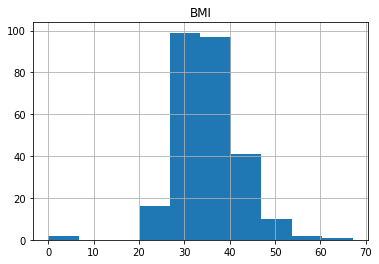

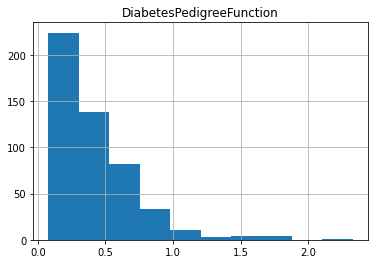

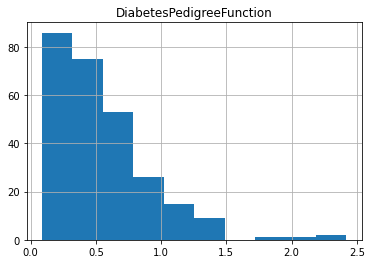

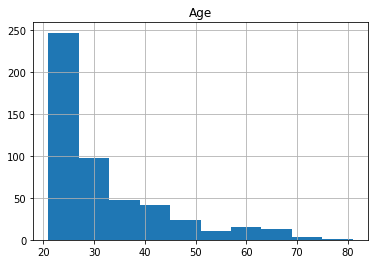

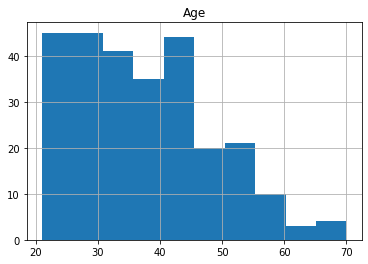

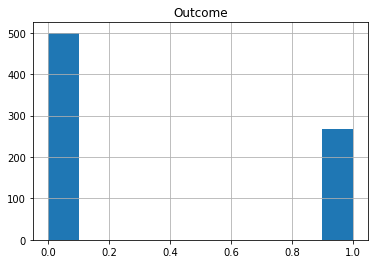

In [13]:
y_0 = dataset.loc[dataset['Outcome'] == 0]
y_1 = dataset.loc[dataset['Outcome'] == 1]
for c in dataset.keys():
    if(c != 'Outcome'):
        y_0.hist(column = c, bins = 10)
        y_1.hist(column = c, bins = 10)
    else:
        dataset.hist(column = 'Outcome')

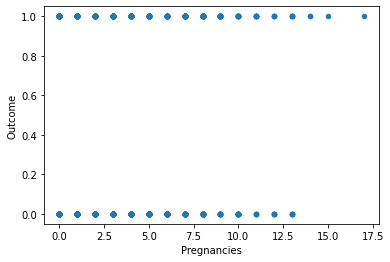

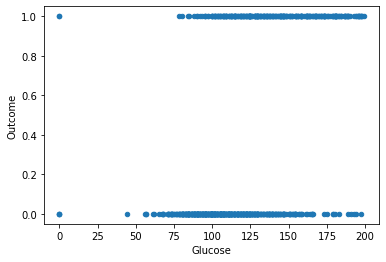

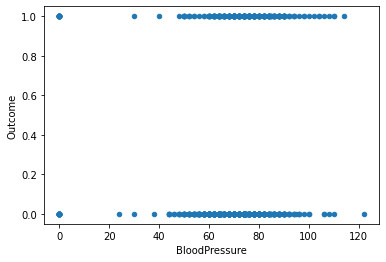

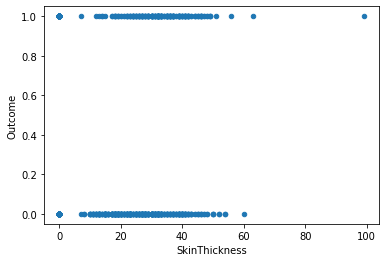

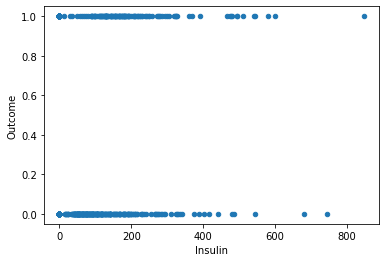

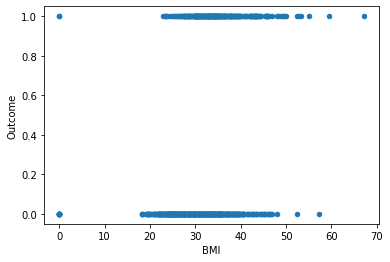

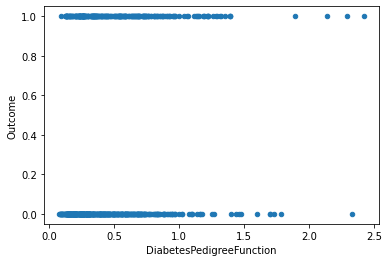

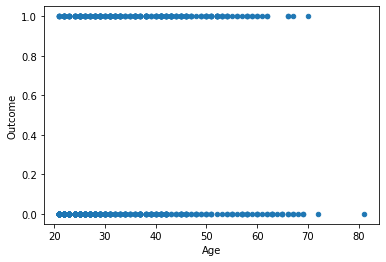

In [14]:
for c in dataset.keys():
    if(c != 'Outcome'):
        _ = dataset.plot.scatter(x = c, y = 'Outcome')

## Matriz de Correlação

In [15]:
corr_df = dataset.corr(method = 'pearson')
corr_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [16]:
corr_df.style.background_gradient(cmap='coolwarm')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


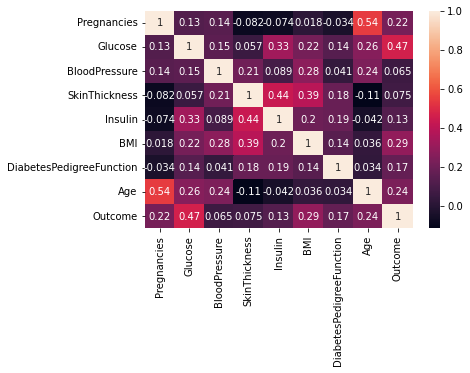

In [17]:
_ = sns.heatmap(corr_df, xticklabels=corr_df.columns, yticklabels=corr_df.columns, annot=True)

Text(0.5, 1.05, 'Correlation Matrix')

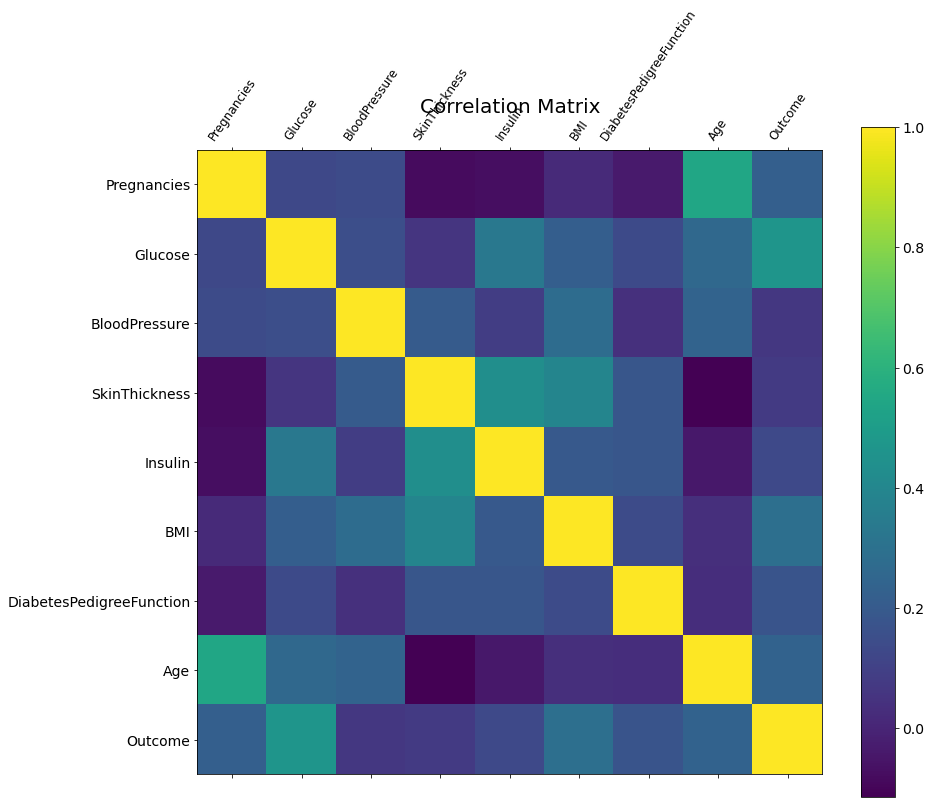

In [18]:
fig = plt.figure(figsize = (14, 12))
plt.matshow(corr_df, fignum = fig.number)
plt.xticks(range(dataset.shape[1]), dataset.columns, fontsize = 12, rotation = 55)
plt.yticks(range(dataset.shape[1]), dataset.columns, fontsize = 14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize = 14)
plt.title('Correlation Matrix', fontsize = 20)

In [19]:
var_grafico = px.scatter(dataset, 'Glucose', 'BMI', 'Outcome')
var_grafico.show()

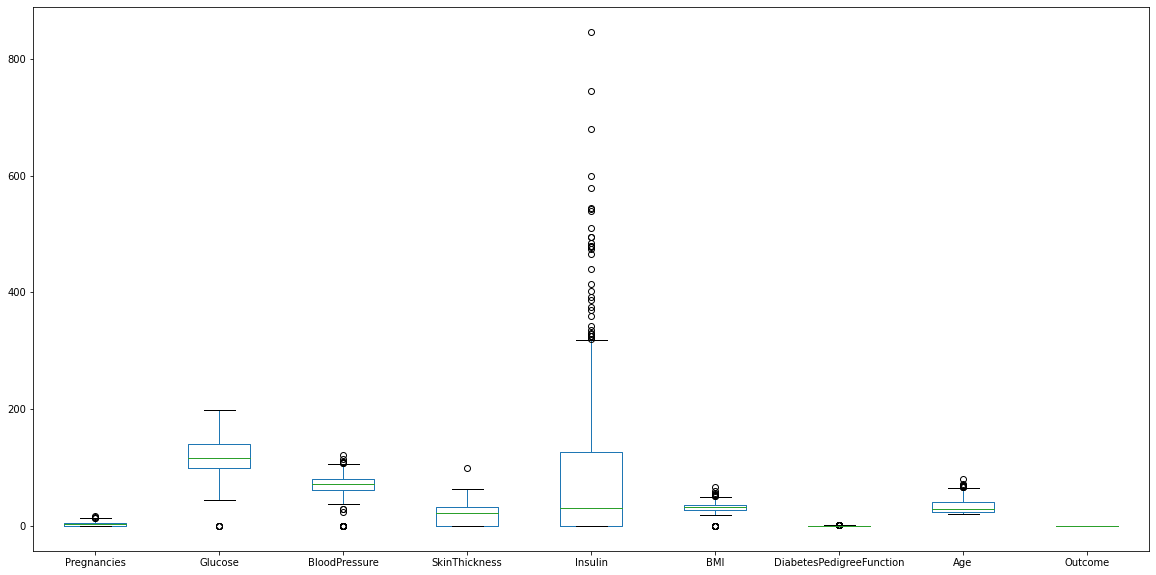

In [20]:
_ = dataset.plot(kind = 'box', figsize = (20, 10))
plt.show()

# PRÉ-TREINAMENTO

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [22]:
X_dataset = dataset.drop(['BloodPressure', 'SkinThickness'], axis = 1)
#X_dataset = dataset.drop(['Pregnancies', 'BloodPressure', 'SkinThickness'], axis = 1)
X_dataset = X_dataset.values
y_dataset = dataset.iloc[:, -1].values

In [23]:
print(X_dataset.shape)
print(y_dataset.shape)

(768, 7)
(768,)


**Atributos previsores separados do target**

## Escalonamento dos Atributos

In [24]:
scaler_dataset = StandardScaler()
X_dataset = scaler_dataset.fit_transform(X_dataset)

In [25]:
X_dataset

array([[ 0.63994726,  0.84832379, -0.69289057, ...,  0.46849198,
         1.4259954 ,  1.36589591],
       [-0.84488505, -1.12339636, -0.69289057, ..., -0.36506078,
        -0.19067191, -0.73212021],
       [ 1.23388019,  1.94372388, -0.69289057, ...,  0.60439732,
        -0.10558415,  1.36589591],
       ...,
       [ 0.3429808 ,  0.00330087,  0.27959377, ..., -0.68519336,
        -0.27575966, -0.73212021],
       [-0.84488505,  0.1597866 , -0.69289057, ..., -0.37110101,
         1.17073215,  1.36589591],
       [-0.84488505, -0.8730192 , -0.69289057, ..., -0.47378505,
        -0.87137393, -0.73212021]])

## Separação dos dados em Treinamento e Teste

In [26]:
#random_state garante sempre os mesmos dados em treinamento e teste
#Com isso é possível comparar os resultados
X_dataset_treinamento, X_dataset_teste, y_dataset_treinamento, y_dataset_teste = train_test_split(X_dataset, y_dataset, test_size = 0.2, random_state = 0)

In [27]:
X_dataset_treinamento.shape, X_dataset_teste.shape

((614, 7), (154, 7))

In [28]:
y_dataset_treinamento.shape, y_dataset_teste.shape

((614,), (154,))

## Salvar os registros escalonados

In [29]:
with open('dataset.pkl', mode = 'wb') as f:
    pickle.dump([X_dataset_treinamento, y_dataset_treinamento, X_dataset_teste, y_dataset_teste], f)

# TREINAMENTO

In [51]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.model_selection import GridSearchCV

In [31]:
with open('dataset.pkl', 'rb') as f:
    X_dataset_treinamento, y_dataset_treinamento, X_dataset_teste, y_dataset_teste = pickle.load(f) 

In [32]:
X_dataset_treinamento

array([[ 0.93691372,  0.91091809,  0.40115431, ...,  0.66479969,
         1.76634642,  1.36589591],
       [ 0.04601433, -0.74783062, -0.69289057, ..., -0.08720986,
        -0.95646168, -0.73212021],
       [-1.14185152,  1.38037527,  5.21147866, ..., -0.13553176,
        -0.87137393, -0.73212021],
       ...,
       [ 0.04601433, -0.84172205, -0.69289057, ..., -0.97814487,
        -1.04154944, -0.73212021],
       [ 2.12477957, -1.12339636, -0.69289057, ..., -0.51908683,
         0.14967911, -0.73212021],
       [ 0.3429808 ,  0.47275805, -0.69289057, ...,  0.50775352,
         3.04266271, -0.73212021]])

In [33]:
X_dataset_treinamento.shape, y_dataset_treinamento.shape, X_dataset_teste.shape, y_dataset_teste.shape

((614, 7), (614,), (154, 7), (154,))

In [34]:
y_dataset_treinamento

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

## Naive Bayes

In [35]:
from sklearn.naive_bayes import GaussianNB

In [36]:
naive_dataset = GaussianNB()

In [37]:
naive_dataset.fit(X_dataset_treinamento, y_dataset_treinamento)

GaussianNB()

In [38]:
previsoes_naive = naive_dataset.predict(X_dataset_teste)

In [39]:
accuracy_naive = accuracy_score(y_dataset_teste, previsoes_naive)
accuracy_naive

1.0

In [40]:
confusion_matrix(y_dataset_teste, previsoes_naive)

array([[107,   0],
       [  0,  47]])

In [41]:
print(classification_report(y_dataset_teste, previsoes_naive))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       107
           1       1.00      1.00      1.00        47

    accuracy                           1.00       154
   macro avg       1.00      1.00      1.00       154
weighted avg       1.00      1.00      1.00       154



## Decision Tree

In [42]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
dectree_dataset = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

In [44]:
dectree_dataset.fit(X_dataset_treinamento, y_dataset_treinamento)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [45]:
previsoes_dectree = dectree_dataset.predict(X_dataset_teste)

In [46]:
accuracy_dectree = accuracy_score(y_dataset_teste, previsoes_dectree)
accuracy_dectree

1.0

In [47]:
confusion_matrix(y_dataset_teste, previsoes_dectree)

array([[107,   0],
       [  0,  47]])

In [48]:
print(classification_report(y_dataset_teste, previsoes_dectree))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       107
           1       1.00      1.00      1.00        47

    accuracy                           1.00       154
   macro avg       1.00      1.00      1.00       154
weighted avg       1.00      1.00      1.00       154



### GridSearchCV

In [49]:
parametros = {'criterion': ['gini', 'entropy'],
             'splitter': ['best', 'random'],
             'min_samples_split': [2, 5, 10],
             'min_samples_leaf': [1, 5, 10], 
             'random_state': [0]}

In [52]:
#Combinando todos com todos
#Primeiro: gini com best, 2 e 1
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=parametros)
#Ajuste de todos os parametros
grid_search.fit(X_dataset_treinamento, y_dataset_treinamento)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(f'Melhores parametros: {melhores_parametros}')
print(f'Melhor resultado: {melhor_resultado}')

Melhores parametros: {'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 0, 'splitter': 'best'}
Melhor resultado: 1.0


In [53]:
print(grid_search.cv_results_)

{'mean_fit_time': array([0.00176411, 0.00091023, 0.00099549, 0.00078235, 0.00100923,
       0.00084586, 0.00097065, 0.00077257, 0.00095844, 0.00078464,
       0.00094881, 0.00078988, 0.0009511 , 0.00079441, 0.00103936,
       0.00081248, 0.00095463, 0.00079222, 0.00106144, 0.00079384,
       0.00105724, 0.00079737, 0.00104909, 0.00077872, 0.00106802,
       0.00079637, 0.00114336, 0.00081062, 0.00113416, 0.00077648,
       0.00120625, 0.0007813 , 0.00104408, 0.00079103, 0.00104938,
       0.0007946 ]), 'std_fit_time': array([1.34013533e-03, 1.50355489e-04, 3.43873985e-05, 1.07733545e-05,
       8.88012394e-05, 9.85930906e-05, 1.95278643e-05, 5.70134551e-06,
       1.61640060e-05, 1.04871658e-05, 5.64724993e-06, 1.23968491e-05,
       3.86914497e-06, 2.48024087e-05, 1.71798850e-04, 5.65393763e-05,
       1.19456988e-05, 1.00287822e-05, 1.05012491e-05, 4.19670882e-06,
       4.45938355e-06, 9.54222522e-06, 6.56824795e-06, 1.12632530e-05,
       1.30609867e-05, 9.27984406e-06, 7.34712451e

In [54]:
print(grid_search.cv_results_['params'][0])
print(grid_search.cv_results_['params'][1])

{'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 0, 'splitter': 'best'}
{'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 0, 'splitter': 'random'}


##Random Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
randforest_dataset = RandomForestClassifier(n_estimators = 15, criterion = 'entropy', random_state = 0)
randforest_dataset.fit(X_dataset_treinamento, y_dataset_treinamento)

RandomForestClassifier(criterion='entropy', n_estimators=15, random_state=0)

In [57]:
previsoes_randforest = randforest_dataset.predict(X_dataset_teste)

In [58]:
accuracy_randforest = accuracy_score(y_dataset_teste, previsoes_randforest)
accuracy_randforest

1.0

In [59]:
confusion_matrix(y_dataset_teste, previsoes_randforest)

array([[107,   0],
       [  0,  47]])

In [60]:
print(classification_report(y_dataset_teste, previsoes_randforest))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       107
           1       1.00      1.00      1.00        47

    accuracy                           1.00       154
   macro avg       1.00      1.00      1.00       154
weighted avg       1.00      1.00      1.00       154



## KNN

In [61]:
from sklearn.neighbors import KNeighborsClassifier

In [62]:
parametros = {'n_neighbors': [3, 5, 10, 20],
             'p': [1, 2]}

In [63]:
grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=parametros)
#Ajuste de todos os parametros
grid_search.fit(X_dataset_treinamento, y_dataset_treinamento)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(f'Melhores parametros: {melhores_parametros}')
print(f'Melhor resultado: {melhor_resultado}')

Melhores parametros: {'n_neighbors': 20, 'p': 1}
Melhor resultado: 1.0


## Logistic Regression

In [64]:
from sklearn.linear_model import LogisticRegression

In [65]:
parametros = {'tol': [0.0001, 0.00001, 0.000001],
             'C': [1.0, 1.5, 2.0],
             'solver': ['lbfgs', 'sag', 'saga']}

In [72]:
grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=parametros)
grid_search.fit(X_dataset_treinamento, y_dataset_treinamento)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(f'Melhores parametros: {melhores_parametros}')
print(f'Melhor resultado: {melhor_resultado}')

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.7/dist-packages/sklearn

Melhores parametros: {'C': 1.0, 'solver': 'lbfgs', 'tol': 0.0001}
Melhor resultado: 1.0


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.7/dist-packages/sklearn

##SVM

In [73]:
from sklearn.svm import SVC

In [74]:
parametros = {'tol': [0.0001, 0.00001, 0.000001],
             'C': [1.0, 1.5, 2.0],
             'kernel': ['rbf', 'linear', 'poly', 'sigmoid']}

In [75]:
grid_search = GridSearchCV(estimator=SVC(), param_grid=parametros)
grid_search.fit(X_dataset_treinamento, y_dataset_treinamento)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(f'Melhores parametros: {melhores_parametros}')
print(f'Melhor resultado: {melhor_resultado}')

Melhores parametros: {'C': 1.0, 'kernel': 'linear', 'tol': 0.0001}
Melhor resultado: 1.0


##Neural Network

In [76]:
from sklearn.neural_network import MLPClassifier

In [77]:
parametros = {'activation': ['relu', 'logistic', 'tanh'],
             'solver': ['adam', 'sgd'],
             'batch_size': [10, 56],
             'hidden_layer_sizes': [(4)]}

In [78]:
grid_search = GridSearchCV(estimator=MLPClassifier(), param_grid=parametros)
grid_search.fit(X_dataset_treinamento, y_dataset_treinamento)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(f'Melhores parametros: {melhores_parametros}')
print(f'Melhor resultado: {melhor_resultado}')

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

Melhores parametros: {'activation': 'relu', 'batch_size': 10, 'hidden_layer_sizes': 4, 'solver': 'adam'}
Melhor resultado: 1.0


#REFERÊNCIAS

KNN 99,3%, NB e SVM 100% – Análise de dados e remoção de Pregnancies, SkinThinckness e BloodPressure

https://www.youtube.com/watch?v=uGN5mDg8d8I

XGB 77,49% - Análise de dados, visualização e substituição de valores. SearchCV

https://www.youtube.com/watch?v=BIgvIrCGBZE

Regressão Logística 82,3% – Análise e Escalonamento dos Atributos

[08:40] Remoção de dados considerados outliers

[15:00] Normalização com simples divisão pelo valor máximo

https://www.youtube.com/watch?v=dW3x6bM5Mjo

Regressão Logística – Pouca análise – 78% de precisão

https://www.youtube.com/watch?v=X0EpG6iGKY0